 estimate the linear relationship between one continuous dependent variable and two or more independent variables

# imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-1-01fc929a4ef1>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv(r'marketing_sales.csv')

# EDA

In [3]:
data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


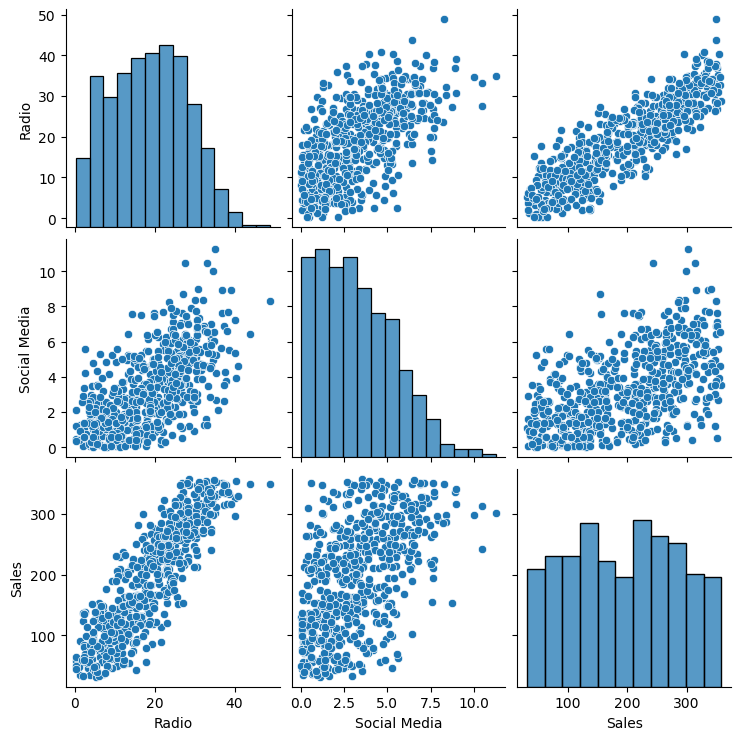

In [4]:
sns.pairplot(data);


In [5]:
print(data.groupby("TV")["Sales"].mean())
print("")
print(data.groupby("Influencer")["Sales"].mean())

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64

Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64


In [6]:
data.dropna(axis=0)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
...,...,...,...,...,...
567,High,28.210738,4.373466,Micro,302.887998
568,Medium,23.578661,2.856657,Mega,232.555023
569,Low,9.169824,0.067279,Nano,73.888838
570,Low,11.563403,1.727947,Nano,121.949570


In [7]:
data = data.rename(columns={"Social Media":"Social_Media"})

# Model Building

In [8]:
ols_formula = "Sales ~ C(TV) + Radio"
ols = ols (formula = ols_formula, data = data)
model = ols.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):          1.61e-287
Time:                        02:19:28   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linearity 

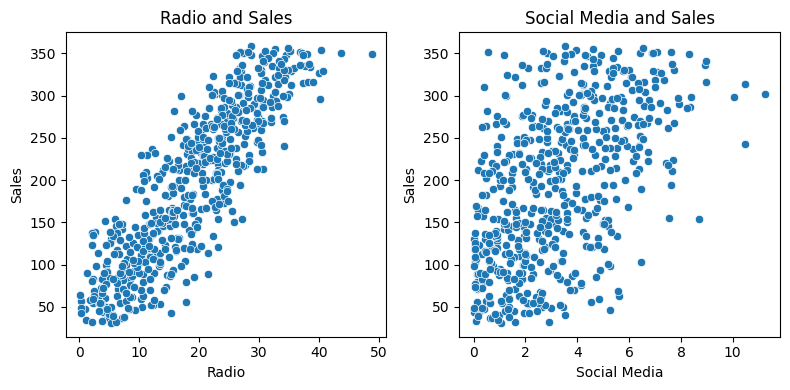

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.scatterplot(x = data['Radio'], y = data['Sales'],ax=axes[0])
axes[0].set_title("Radio and Sales")
sns.scatterplot(x = data["Social_Media"], y = data["Sales"], ax = axes [1])
axes[1].set_title("Social Media and Sales")
axes[1].set_xlabel("Social Media")
plt.tight_layout()

## Normality

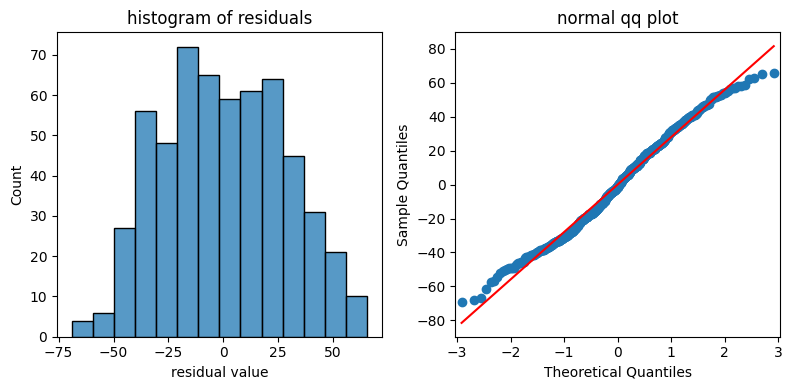

In [10]:
residuals = model.resid
fig, axes = plt.subplots(1,2, figsize =(8,4))

sns.histplot(residuals,ax=axes[0])
axes[0].set_xlabel("residual value")
axes[0].set_title("histogram of residuals")


sm.qqplot(residuals, line="s", ax=axes[1])
axes[1].set_title("normal qq plot")
plt.tight_layout()
plt.show()

## Constant Variance 

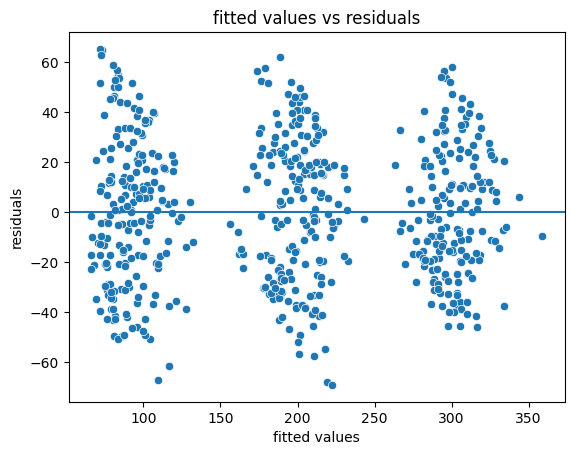

In [11]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("fitted values")
fig.set_ylabel("residuals")
fig.set_title("fitted values vs residuals")

fig.axhline(0)
plt.show()

## No Multicollinearity

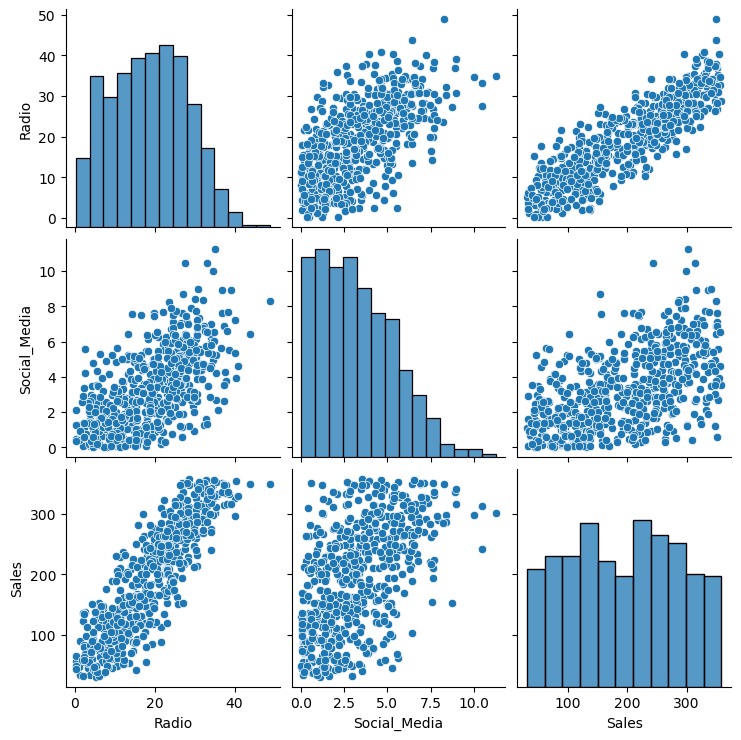

In [12]:
sns.pairplot(data);

In [22]:
data = data.dropna()
data.reset_index(inplace=True, drop=True)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = data[["Radio", "Social_Media"]]
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
df_vif = pd.DataFrame(vif, index=x.columns, columns = ["vif"])
df_vif

,vif
Radio,4.93238
Social_Media,4.93238


In [24]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):          1.61e-287
Time:                        02:19:28   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""